# **Background**

This dataset is tailored for diabetes risk prediction. It includes key health attributes such as pregnancy history, blood glucose levels, blood pressure, skin thickness, insulin levels, BMI, diabetes hereditary factors, age, and a binary outcome (1 for positive diagnosis, 0 for negative). Researchers can use these attributes to build predictive models for early diabetes detection, helping individuals assess their risk based on health parameters and demographic data.

## **Glossary**

| Feature | Description |
| --- | --- |
| Pregnancies | To express the Number of pregnancies. |
| Glucose | To express the Glucose level in blood. |
| BloodPressure |  To express the Blood pressure measurement. |
| SkinThickness | To express the thickness of the skin. |
| Insulin | To express the Insulin level in blood. |
| BMI | To express the Body mass index. |
| DiabetesPedigreeFunction | To express the Diabetes percentage. |
| Age |  To express the age. |
| Outcome |  To express the final result 1 is Yes and 0 is No. |

# **Data Visualization**

In [1]:
# Library Import

import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


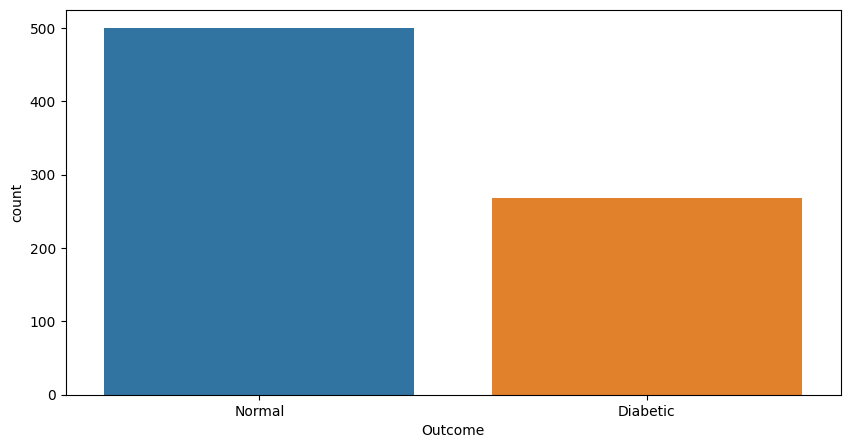

In [14]:
labels = ['Normal','Diabetic']

plt.figure(figsize=(10,5))

sns.countplot(x='Outcome',data=df)

plt.xticks(range(2),labels)
plt.show()

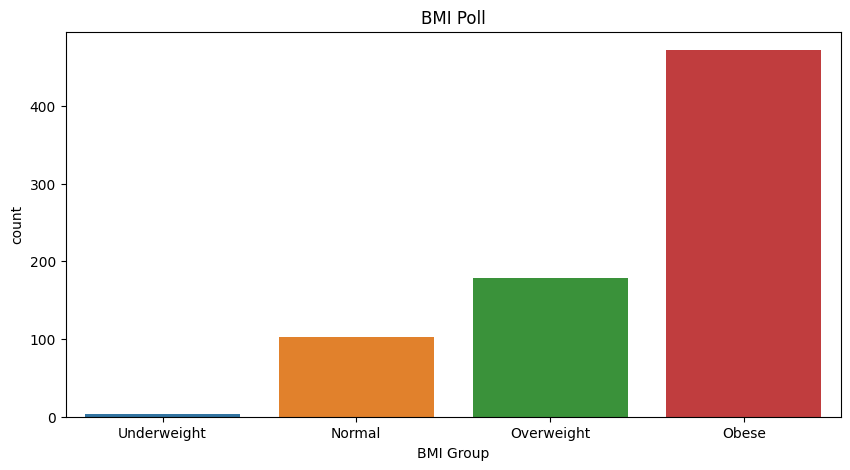

In [22]:
bmi_bins = [0, 18.5, 24.9, 29.9, 100]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']

# Categorize the 'BMI' values into groups
df['BMI Group'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels)

plt.figure(figsize=(10,5))

sns.countplot(data=df, x='BMI Group', order=bmi_labels)

plt.title('BMI Poll')
plt.show()


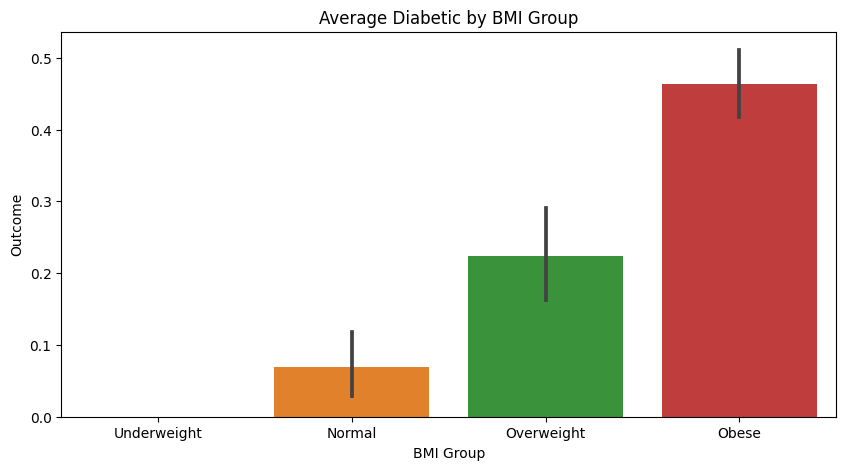

In [25]:
plt.figure(figsize=(10,5))

sns.barplot(x='BMI Group',y='Outcome',data=df,order=bmi_labels)

plt.title('Average Diabetic by BMI Group')
plt.show()

In [ ]:
def group_age(age):
    if age < 18:
        return "Under 18"
    elif 18 <= age < 30:
        return "18-29"
    elif 30 <= age < 45:
        return "30-44"
    elif 45 <= age < 60:
        return "45-59"
    else:
        return "60 and over"
    
df['AgeGroup'] = df['Age'].apply(group_age)
order = ['18-29','30-44','45-59','60 and over']

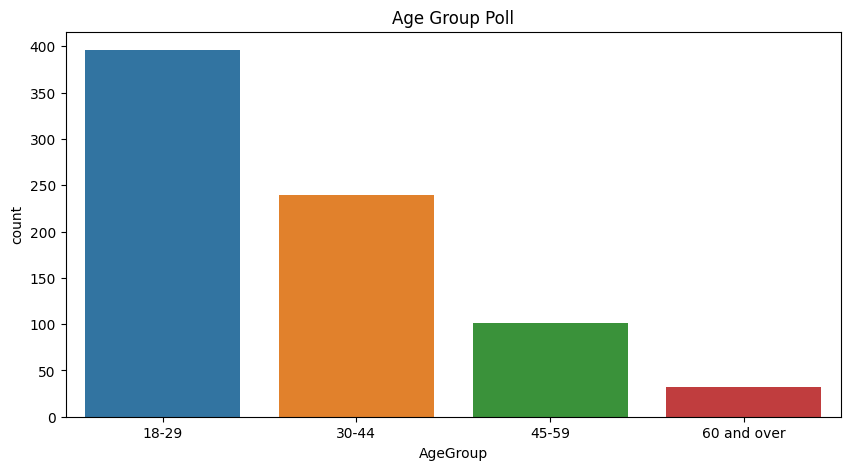

In [23]:
plt.figure(figsize=(10,5))

sns.countplot(data=df,x='AgeGroup',order=order)

plt.title('Age Group Poll')
plt.show()


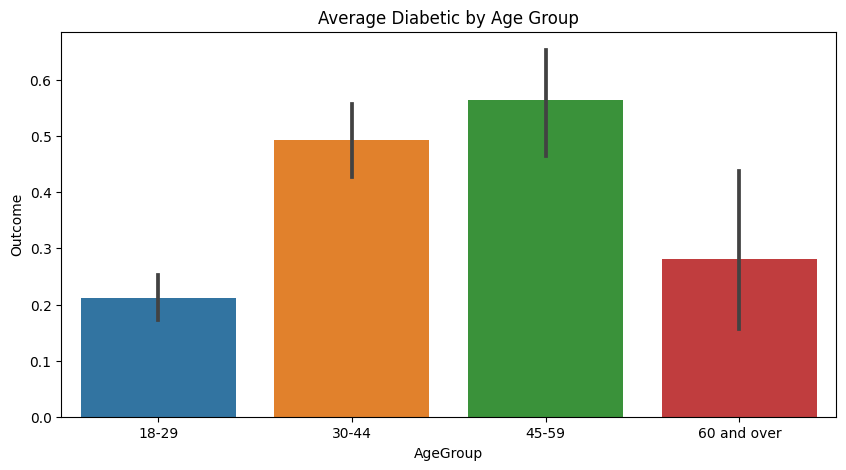

In [18]:
plt.figure(figsize=(10,5))

sns.barplot(x='AgeGroup',y='Outcome',data=df,order=order)

plt.title('Average Diabetic by Age Group')
plt.show()

In [6]:
df_pred = df[['Outcome','Insulin']]
df_pred.head()

,Outcome,Insulin
0,1,0
1,0,0
2,1,0
3,0,94
4,1,168


In [7]:
# Regression Model

reg_models = sm.OLS(df_pred['Outcome'], sm.add_constant(df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin'
          ,'BMI','Age']]))
result = reg_models.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     45.09
Date:                Mon, 18 Sep 2023   Prob (F-statistic):           1.92e-53
Time:                        14:07:16   Log-Likelihood:                -387.28
No. Observations:                 768   AIC:                             790.6
Df Residuals:                     760   BIC:                             827.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.8233      0.086     -9.628

In [8]:
def model(x1,x2,x3,x4,x5,x6,x7):
    y = -0.8233 + (0.0197*x1) + (0.0060*x2) + (-0.0024*x3) + (0.0005*x4) + (-0.0001*x5) + (0.0136*x6) + (0.0029*x7)
    return y

# Inputs: Pregnancies Count, Glucose, BloodPressure, SkinThickness, Insulin, BMI, Age
res = model(0,130,77,34,99,40,25)

def classify_result(y):
    if y >= 0.5:
        return 1  # Yes
    else:
        return 0  # No

# Classify the result based on the threshold
classification = classify_result(res)

print(f"Model output (res): {res}")
print(f"Classification: {'Yes' if classification == 1 else 'No'}")


Model output (res): 0.39549999999999996
Classification: No
